In [29]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


In [41]:
linnerud = load_linnerud(as_frame=True)
data = load_linnerud()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(10)

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [31]:
data.feature_names

['Chins', 'Situps', 'Jumps']

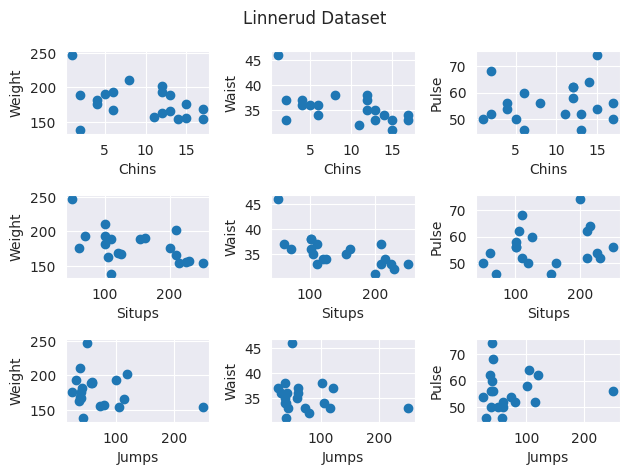

In [42]:
fig, axs = plt.subplots(3, 3)
fig.suptitle('Linnerud Dataset')
for i in range(3):
    for j in range(3):
        axs[i, j].scatter(linnerud['data'].iloc[:, i], linnerud['target'].iloc[:, j])
        axs[i, j].set_xlabel(list(linnerud['data'])[i])
        axs[i, j].set_ylabel(list(linnerud['target'])[j])
plt.tight_layout()
plt.show()

In [52]:
data.data = preprocessing.scale(data.data)
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.25, random_state=42)
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()


In [53]:
ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Оценка модели
y_pred = ols_reg.predict(X_test)

# Оценка точности модели
score = ols_reg.score(X_test, y_test)
print(score)

-1.3436872942388012
